In [146]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [147]:
df= pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Data Cleaning

In [148]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [149]:
df.shape

(5572, 5)

In [150]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [152]:
df= df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], axis=1)

In [153]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [154]:
#renaming columns
df.rename(columns={'v1' : 'outcome', 'v2' : 'text'}, inplace= True)
df

,outcome,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [155]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder


In [156]:
#transformation using column transformer

#  trans1=ColumnTransformer(transformers=[('trans1', OrdinalEncoder(categories=[['ham','spam']]), ['outcome'])], remainder='passthrough')
# new_df= trans1.fit_transform(df)
# df= pd.DataFrame(new_df)

In [157]:
from sklearn.preprocessing import LabelEncoder
oe = LabelEncoder()
df['outcome'] = oe.fit_transform(df['outcome'])

In [158]:
df

,outcome,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [159]:
#checking for missing values
df.isnull().sum()

outcome    0
text       0
dtype: int64

In [160]:
#checking for duplicate values
df.duplicated().sum()

403

In [161]:
df= df.drop_duplicates(keep= 'first')
df

,outcome,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


# EDA

In [162]:
df['outcome'].value_counts()

outcome
0    4516
1     653
Name: count, dtype: int64

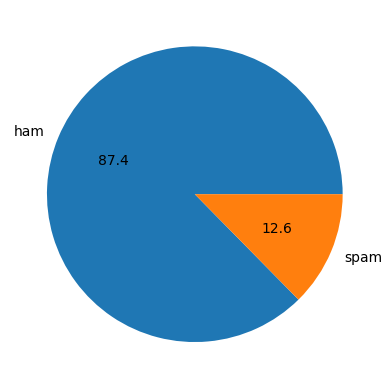

In [163]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.pie(df['outcome'].value_counts(), labels= ['ham', 'spam'], autopct='%0.1f')
plt.show()

In [164]:
#using Natural Natural Processing (NLP) to create features
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

[nltk_data] Downloading package punkt_tab to C:\Users\Utsav
[nltk_data]     Jana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [165]:
#finding no. of characters
df['num_char']= df['text'].apply(len)

C:\Users\Utsav Jana\AppData\Local\Temp\ipykernel_20504\980387446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_char']= df['text'].apply(len)


In [166]:
#finding no. of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))  


C:\Users\Utsav Jana\AppData\Local\Temp\ipykernel_20504\1518584080.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [167]:
#finding no. of words

df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\Utsav Jana\AppData\Local\Temp\ipykernel_20504\2697544301.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences']= df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [168]:
df

,outcome,text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [169]:
df[['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [170]:
#ham messages

df[df['outcome'] == '0'][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


In [171]:
#spam messages

df[df['outcome'] == '1'][['num_char', 'num_words', 'num_sentences']].describe()

,num_char,num_words,num_sentences
count,0.0,0.0,0.0
mean,NaN,NaN,NaN
std,NaN,NaN,NaN
min,NaN,NaN,NaN
25%,NaN,NaN,NaN
50%,NaN,NaN,NaN
75%,NaN,NaN,NaN
max,NaN,NaN,NaN


<Axes: xlabel='num_char', ylabel='Count'>

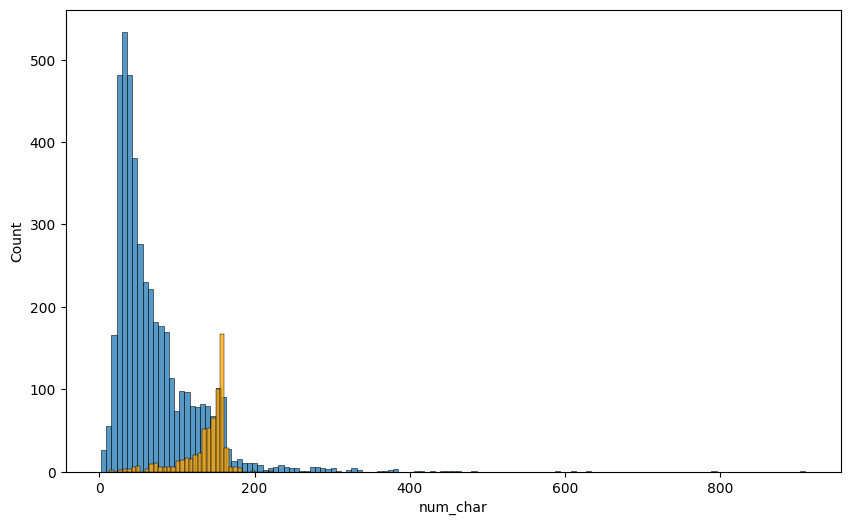

In [172]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['outcome'] == 0]['num_char'])
sns.histplot(df[df['outcome'] == 1]['num_char'], color= 'orange')

<Axes: xlabel='num_words', ylabel='Count'>

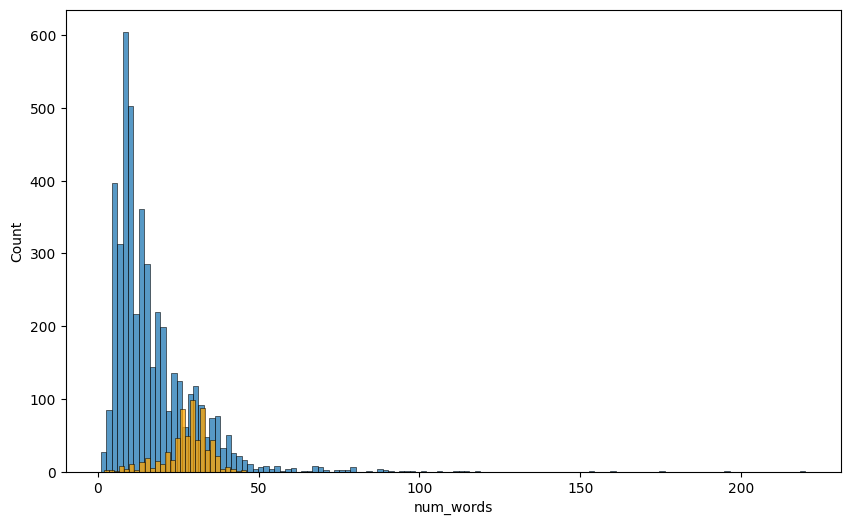

In [173]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['outcome'] == 0]['num_words'])
sns.histplot(df[df['outcome'] == 1]['num_words'], color= 'orange')

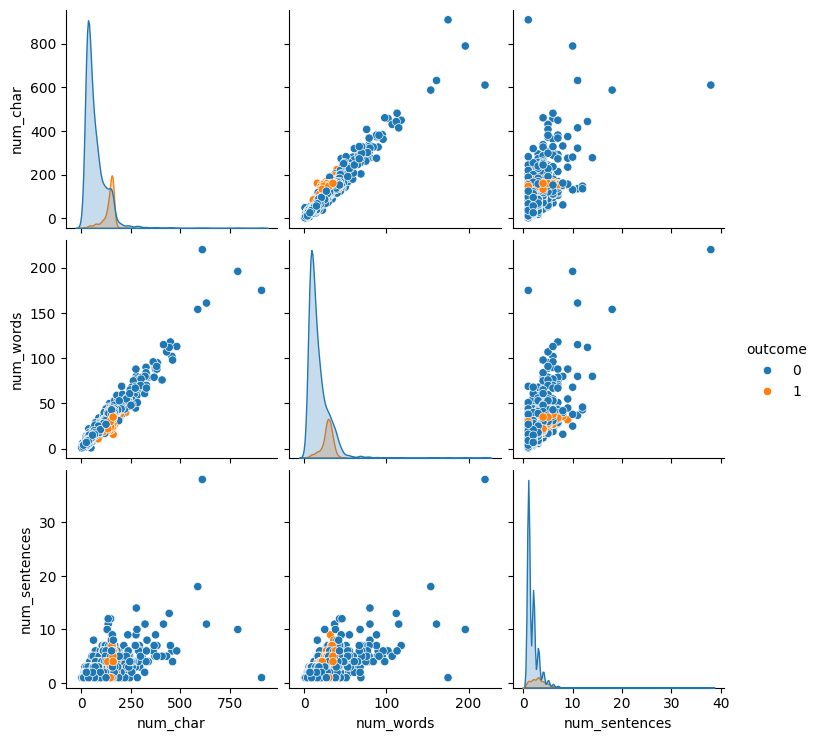

In [174]:
#checking corelation of the two columns

sns.pairplot(df, hue='outcome')

# Data Processing

-> lower cases 
-> Tokenization
-> Removing special Charaecter
-> Removing stop words and punctuation
-> Stemming


In [175]:
#creating master function to process data
import string 
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

ss= SnowballStemmer(language = 'english')

def text_transform(text):

    ret_text= []
    text=text.lower()
    text= nltk.word_tokenize(text)
    for i in text:
        if i.isalnum() and i not in stopwords.words('english') and i not in string.punctuation:

            ret_text.append(ss.stem(i))
    
    return " ".join(ret_text) #converting list to string using the join fuction





In [176]:
text_transform('this is not real is it?')

'real'

In [177]:
df['processed_text']= df['text'].apply(text_transform)

C:\Users\Utsav Jana\AppData\Local\Temp\ipykernel_20504\3694953483.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['processed_text']= df['text'].apply(text_transform)


In [178]:
df.head()

,outcome,text,num_char,num_words,num_sentences,processed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


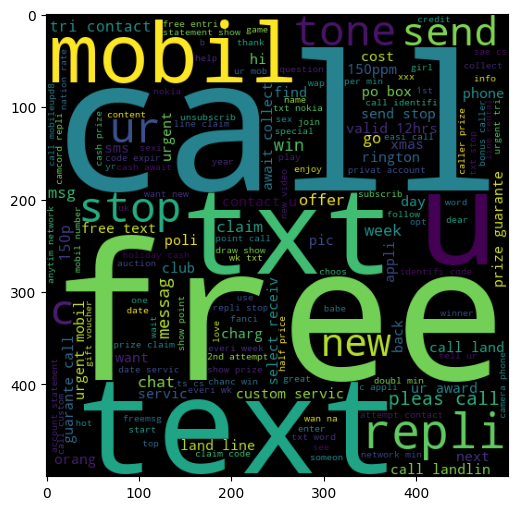

In [179]:
#visualizing most used words

from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['outcome'] == 1]['processed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [180]:
#counting the most recurring words in spam messages

spam_corpus=[]

for i in df[df['outcome'] == 1]['processed_text'].tolist():
    for word in i.split():
        spam_corpus.append(word)

len(spam_corpus)

9939

In [181]:
#counting no. of occurances

from collections import Counter
Counter(spam_corpus)

pd.DataFrame(Counter(spam_corpus).most_common(30))

,0,1
0,call,320
1,free,191
2,2,155
3,txt,130
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [182]:
#counting the most recurring words in ham messages

ham_corpus=[]

for i in df[df['outcome'] == 0]['processed_text'].tolist():
    for word in i.split():
        ham_corpus.append(word)

len(ham_corpus)

35404

In [183]:
#counting no. of occurances

from collections import Counter
Counter(ham_corpus)

pd.DataFrame(Counter(ham_corpus).most_common(30))


,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


# Model Building

In [184]:
#using bag of words and Term Frequency/ Inverse Document Frequency to vectorize processed_text

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv= CountVectorizer()
tf= TfidfVectorizer(max_features=3000)

X=tf.fit_transform(df['processed_text']).toarray()  #as the output is a sparse matrix and needs to be converted to an array
# pd.DataFrame(X)
y=df['outcome']
# pd.DataFrame(y)

In [185]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,accuracy_score, precision_score

X_train,X_test,y_train,y_test= train_test_split(X,y, test_size= 0.2, random_state=42)




In [186]:
#importing algos

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [187]:
lrc = LogisticRegression(solver='liblinear', penalty='l1')
svc = SVC(kernel='sigmoid', gamma=1.0)
gnb= GaussianNB()
bnb= BernoulliNB()
mnb= MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
knc = KNeighborsClassifier()
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [188]:
clfs = {
    'LR': lrc,
    'SVC' : svc,
    'GNB' : gnb,
    'BNB' : bnb,
    'MNB' : mnb,
    'DT': dtc,
    'KN' : knc, 
    'RF': rfc,  
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [189]:
accuracy_scores = []
precision_scores = []


def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)  
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

C:\Users\Utsav Jana\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [190]:
algo_df= pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending =False)
algo_df
#KN has bad accuracy, best is RF

,Algorithm,Accuracy,Precision
6,KN,0.907157,1.000000
4,MNB,0.972921,0.991597
7,RF,0.970019,0.991379
3,BNB,0.973888,0.968254
1,SVC,0.977756,0.962121
10,ETC,0.977756,0.962121
11,GBDT,0.948743,0.950980
12,xgb,0.969052,0.937984
8,AdaBoost,0.956480,0.878788
0,LR,0.946809,0.875000


In [193]:
#thus rainforest algo is chosen with accuracy: 0.970019	and precision: 0.991379

import pickle
pickle.dump(tf,open('vectorizer.pkl','wb'))
pickle.dump(rfc,open('model.pkl','wb'))